Question: Download a real-world dataset containing at least 1000 samples and more than 10 features. Perform exploratory data analysis (EDA) to understand its structure. Apply Principal Component Analysis (PCA) to reduce dimensionality and analyze variance explained  by  principal  components. Visualize  the  dataset  using  different  sets  of principal components and interpret the results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Explaratory Data Analysis (EDA)

In [3]:
wine_data = pd.read_csv('winequality-red.csv',sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

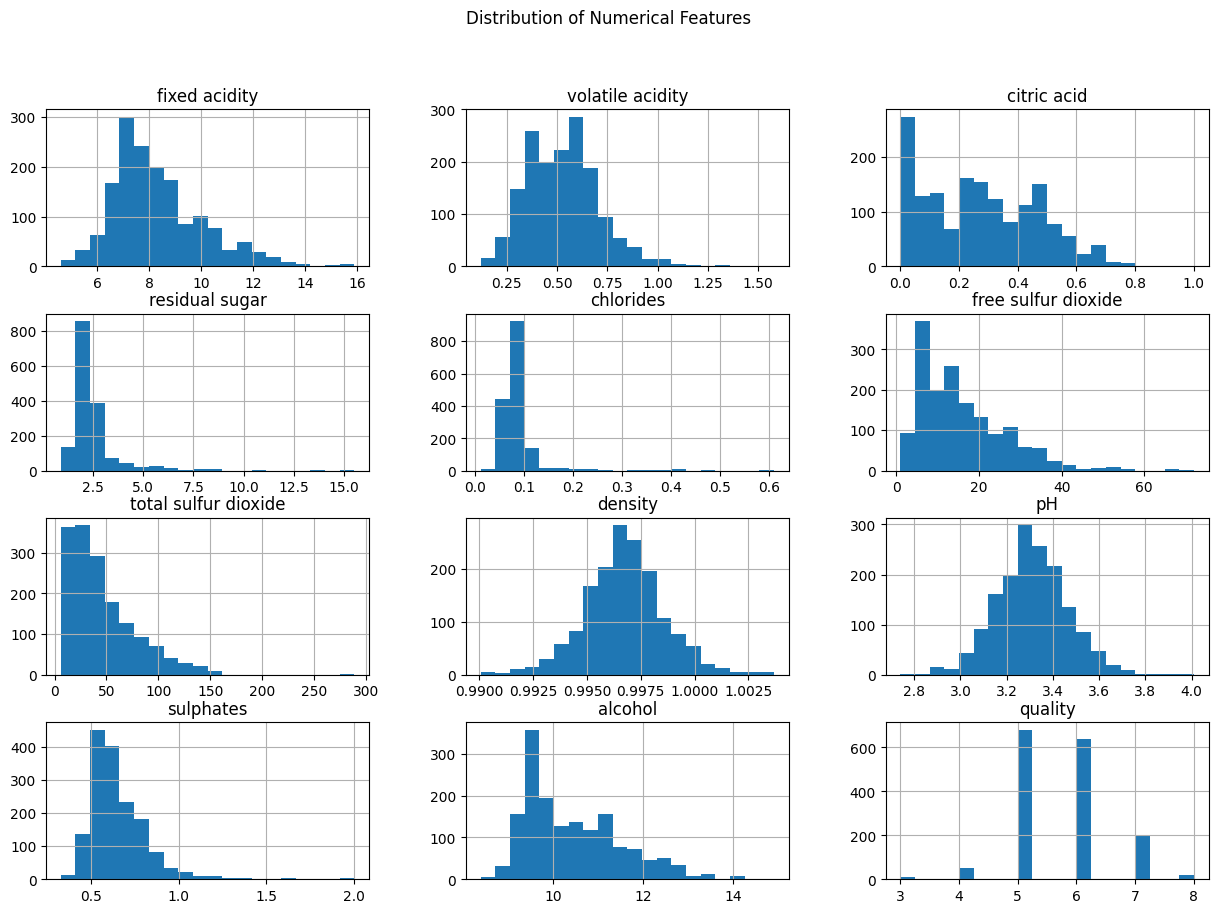

In [7]:
wine_data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

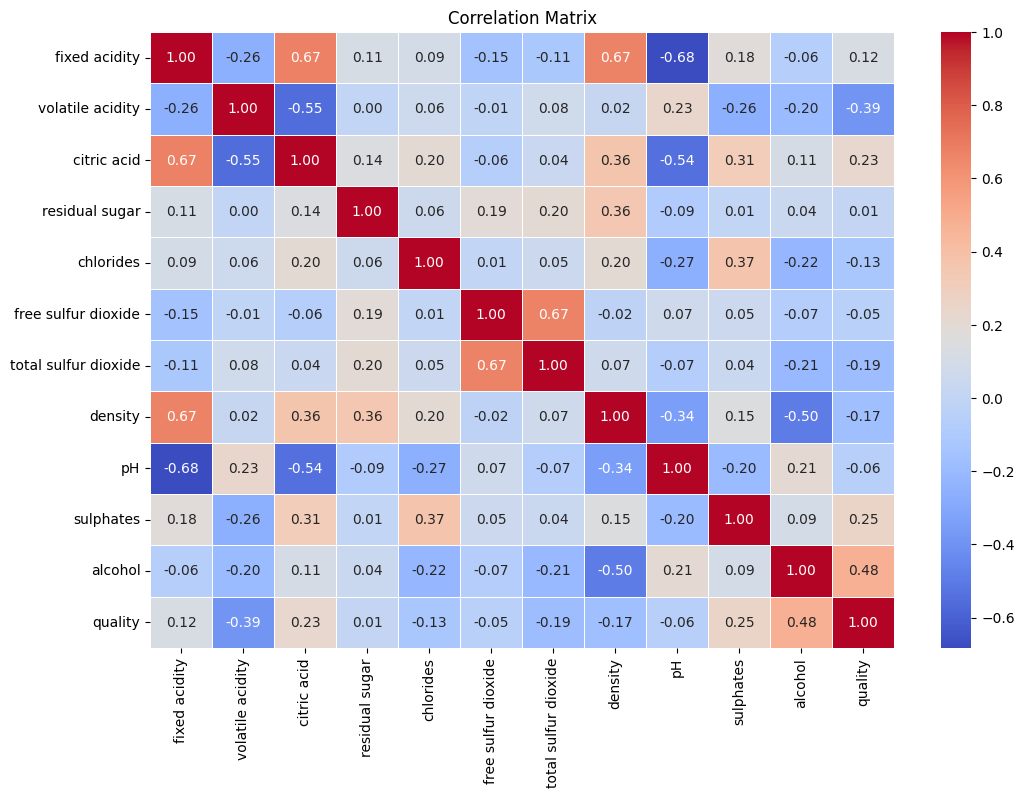

In [8]:
corr_matrix = wine_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Principal Component Analysis (PCA)

In [9]:
wine_data['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
wine = wine_data.drop(columns=['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(wine)

In [12]:
k = 3
pca = PCA(n_components=k)
wine_pca = pca.fit_transform(scaled_wine)

In [13]:
df_wine_pca = pd.DataFrame(wine_pca, columns=[f'PC{i+1}' for i in range(k)])
df_wine_pca.head()

,PC1,PC2,PC3
0,-1.619530,0.450950,-1.774454
1,-0.799170,1.856553,-0.911690
2,-0.748479,0.882039,-1.171394
3,2.357673,-0.269976,0.243489
4,-1.619530,0.450950,-1.774454


In [14]:
exp_var_ratio = pca.explained_variance_ratio_
exp_var_ratio

array([0.28173931, 0.1750827 , 0.1409585 ])

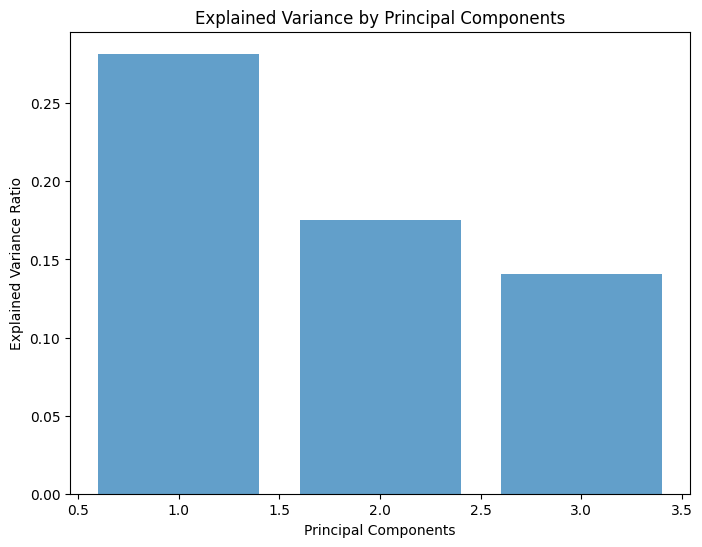

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio, alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

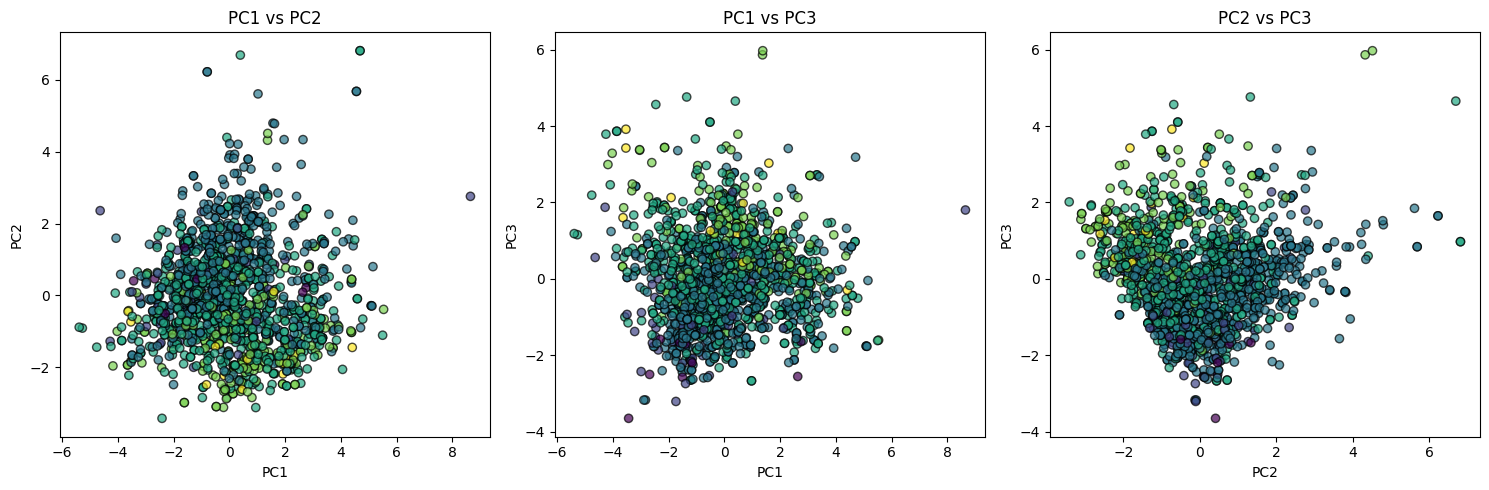

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

axes[0].scatter(df_wine_pca['PC1'], df_wine_pca['PC2'], c=wine_data['quality'], cmap='viridis', edgecolors='k', alpha=0.7)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PC1 vs PC2')

axes[1].scatter(df_wine_pca['PC1'], df_wine_pca['PC3'], c=wine_data['quality'], cmap='viridis', edgecolors='k', alpha=0.7)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC3')
axes[1].set_title('PC1 vs PC3')

axes[2].scatter(df_wine_pca['PC2'], df_wine_pca['PC3'], c=wine_data['quality'], cmap='viridis', edgecolors='k', alpha=0.7)
axes[2].set_xlabel('PC2')
axes[2].set_ylabel('PC3')
axes[2].set_title('PC2 vs PC3')

plt.tight_layout() 
plt.show()